In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

import mylibrary.nnlib as tnn
import copy

In [32]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

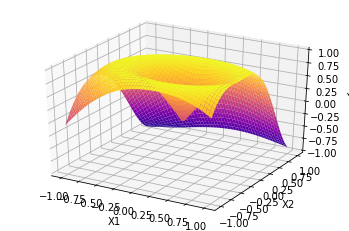

In [33]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Training Neural Network

In [6]:
optimizer = tnn.Adam()
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(2, 5, activation=tnn.Relu(), optimizer=optimizer)
layer2 = tnn.NonLinearLayer(5, 5, activation=tnn.Relu(), optimizer=optimizer)
layer3 = tnn.LinearLayer(5, 1, optimizer = optimizer)

In [7]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.0472553924887964


100 Error =  0.02860560200669753


200 Error =  0.0217080684916528


300 Error =  0.020147798939692076


400 Error =  0.01867866494474909


500 Error =  0.017586114894823975


600 Error =  0.01660606028042187


700 Error =  0.01497996851431219


800 Error =  0.014093286918065539


900 Error =  0.01372814511029218


1000 Error =  0.013414509533466259


1100 Error =  0.013130852429741912


1200 Error =  0.012885993148720453


1300 Error =  0.0126136902015257


1400 Error =  0.012358555130716287


1500 Error =  0.012157468578315322


1600 Error =  0.012008501346117863


1700 Error =  0.011885071955702431


1800 Error =  0.011790605165930787


1900 Error =  0.011708364065932045


TclError: invalid command name "."

0.011708364065932045


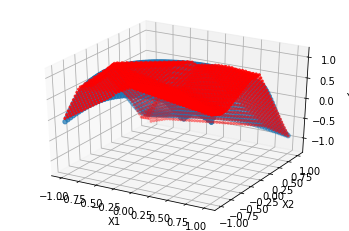

In [8]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X1');ax.set_ylabel('X2');ax.set_zlabel('Y')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
print(error)

# Sorting the neurons

In [34]:
n_neurons = [2,5,5,1]
space_D = 1
layers = [layer1, layer2, layer3]

In [35]:
positions = []
for i, neurons in enumerate(n_neurons):
    pos = np.random.uniform(size=(neurons, space_D))
    positions.append(pos)
positions[0][positions[0].argmax()] = 1.
positions[0][positions[0].argmin()] = 0.

positions

[array([[0.],
        [1.]]), array([[0.10622039],
        [0.1966118 ],
        [0.95250399],
        [0.54391851],
        [0.11348528]]), array([[0.12621178],
        [0.5142839 ],
        [0.62386109],
        [0.34717956],
        [0.52742646]]), array([[0.35526663]])]

In [36]:
### ALGORITHM ###
## Until convergence
'''
1. Normalize the all layer position to range [0,1]
2. Move the neurons iteratively to (previous layers and next layers position)--combined.

'''
pass

In [37]:
mini, maxi = positions[0].min(), positions[0].max()
divisor = maxi-mini

for i in range(len(positions)):
    positions[i] = (positions[i]-mini)/divisor
positions

[array([[0.],
        [1.]]), array([[0.10622039],
        [0.1966118 ],
        [0.95250399],
        [0.54391851],
        [0.11348528]]), array([[0.12621178],
        [0.5142839 ],
        [0.62386109],
        [0.34717956],
        [0.52742646]]), array([[0.35526663]])]

In [38]:
wts_prev = (layer1.weights**2).T
wts_prev

array([[0.11457837, 2.89571202],
       [0.95832348, 0.84821429],
       [2.34048072, 2.45077862],
       [1.45818201, 0.4213334 ],
       [0.23270261, 0.63709315]])

In [39]:
wts_next = layer2.weights**2
wts_next

array([[1.30566689e-01, 2.33193537e+00, 8.04181296e-01, 5.94542480e-01,
        6.50095016e+00],
       [5.38900690e-01, 5.57211948e-01, 1.48109465e-01, 4.98829803e-02,
        3.01134565e-03],
       [1.13923215e-02, 5.56449540e-01, 6.67189432e-01, 2.69649253e-01,
        6.61517842e-07],
       [9.81835366e-02, 9.96766495e-02, 8.83945099e-01, 6.41980782e-01,
        2.73164456e-01],
       [1.27216456e-03, 1.17985162e-03, 1.16363471e+00, 9.67014415e-01,
        9.21618976e-01]])

In [40]:
wts = np.concatenate((wts_prev, wts_next), axis=1)
wts

array([[1.14578375e-01, 2.89571202e+00, 1.30566689e-01, 2.33193537e+00,
        8.04181296e-01, 5.94542480e-01, 6.50095016e+00],
       [9.58323477e-01, 8.48214290e-01, 5.38900690e-01, 5.57211948e-01,
        1.48109465e-01, 4.98829803e-02, 3.01134565e-03],
       [2.34048072e+00, 2.45077862e+00, 1.13923215e-02, 5.56449540e-01,
        6.67189432e-01, 2.69649253e-01, 6.61517842e-07],
       [1.45818201e+00, 4.21333402e-01, 9.81835366e-02, 9.96766495e-02,
        8.83945099e-01, 6.41980782e-01, 2.73164456e-01],
       [2.32702608e-01, 6.37093154e-01, 1.27216456e-03, 1.17985162e-03,
        1.16363471e+00, 9.67014415e-01, 9.21618976e-01]])

In [41]:
pos = np.concatenate((positions[0], positions[2]), axis=0)
pos

array([[0.        ],
       [1.        ],
       [0.12621178],
       [0.5142839 ],
       [0.62386109],
       [0.34717956],
       [0.52742646]])

In [42]:
scaler1 = wts.sum(axis=1, keepdims=True)
scaler1

array([[13.37246638],
       [ 3.1036542 ],
       [ 6.29594055],
       [ 3.87646593],
       [ 3.92451588]])

In [43]:
(wts/scaler1).sum(axis=1)

array([1., 1., 1., 1., 1.])

In [44]:
del_pos = (pos.T*wts/scaler1)
del_pos.shape

(5, 7)

In [45]:
del_pos.sum(axis=1, keepdims=True)

array([[0.61681602],
       [0.42340457],
       [0.51592611],
       [0.36203159],
       [0.55691475]])

### Defining helper functions

In [67]:
def initialize_positions(layers, n_neurons, space_D):
    positions = []
    for i, neurons in enumerate(n_neurons):
        pos = np.random.uniform(size=(neurons, space_D))
        positions.append(pos)
    return positions

In [68]:
def normalize_positions(positions):
    mini, maxi = positions[0].min(axis=0), positions[0].max(axis=0)
    divisor = maxi-mini

    for i in range(len(positions)):
        positions[i] = (positions[i]-mini)/divisor
    return positions

# def normalize_positions(positions):
#     mini = 9e9
#     maxi = -9e9
#     for i in range(len(positions)):
#         mi, ma = positions[i].min(), positions[i].max()
#         if mi<mini:
#             mini=mi
#         if ma>maxi:
#             maxi=ma
    
#     divisor = maxi-mini
#     for i in range(len(positions)):
#         positions[i] = (positions[i]-mini)/divisor
#     return positions

In [69]:
def compute_del_positions(positions, layers):
    del_positions = [0]*len(positions)
    
    for i in range(len(layers)+1):
        if i == 0:
#             wts = layers[i].weights**2
#             wts = layers[i].weights
            wts = np.abs(layers[i].weights)
            pos = positions[i+1]
        elif i == len(layers):
#             wts = (layers[i-1].weights**2).T
#             wts = (layers[i-1].weights).T
            wts = np.abs(layers[i-1].weights.T)
            pos = positions[i-1]
        else:
#             wts_next = layers[i].weights**2
#             wts_next = layers[i].weights
            wts_next = np.abs(layers[i].weights)
#             wts_prev = (layers[i-1].weights**2).T
#             wts_prev = (layers[i-1].weights).T
            wts_prev = np.abs(layers[i-1].weights.T)
            wts = np.concatenate((wts_prev, wts_next), axis=1)
            pos = np.concatenate((positions[i-1], positions[i+1]), axis=0)

        scaler = wts.sum(axis=1, keepdims=True)
#         print(pos.shape, wts.shape, scaler.shape)
        del_pos = (wts/scaler)@pos
        new_pos = del_pos.sum(axis=1, keepdims=True)
        
#         if i == len(layers):
#             print(wts)
#             print(pos)
#             print(del_pos)
#             print(new_pos)
        
        del_positions[i] = - new_pos + positions[i]
    return del_positions

## Doing this iteratively

In [78]:
n_neurons = [2,5,5,1]
space_D = 1
layers = [layer1, layer2, layer3]

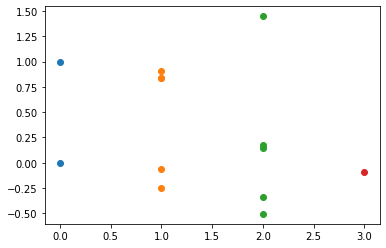

In [79]:
positions = initialize_positions(layers, n_neurons, space_D)
# positions[0] = np.array([[0], [1]])
positions = normalize_positions(positions)

%matplotlib inline
for i, pos in enumerate(positions):
    plt.scatter([i]*len(pos), pos)

In [81]:
lr = 0.5

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(1000):
    
    if epoch%1 == 0:
        ax.clear()
        for i, pos in enumerate(positions):
            ax.scatter([i]*len(pos), pos)
        fig.canvas.draw()
        plt.pause(0.1)
        
    positions = normalize_positions(positions)
    del_positions = compute_del_positions(positions, layers)
    del_positions[0] /= 2
    for i in range(len(positions)):
        positions[i] -= lr*del_positions[i]

TclError: can't invoke "update" command: application has been destroyed

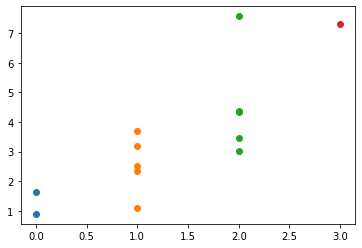

In [73]:
%matplotlib inline
for i, pos in enumerate(positions):
    plt.scatter([i]*len(pos), pos)

In [53]:
layer1.weights

array([[ 0.33849428, -0.97893998, -1.52986298, -1.20755207, -0.48239259],
       [ 1.70167918, -0.9209855 ,  1.56549629,  0.649102  , -0.79818115]])

In [54]:
layer3.weights

array([[ 1.94535036],
       [-0.95299188],
       [-0.72106225],
       [ 0.74199307],
       [ 0.72712263]])

In [74]:
del_positions

[array([[-1.79681469],
        [-1.26887482]]), array([[ 0.21620378],
        [-0.17486203],
        [-1.6507906 ],
        [-0.76578729],
        [-0.64608644]]), array([[ 2.95764268],
        [ 0.65615239],
        [-0.27528381],
        [ 0.0457579 ],
        [ 0.67963668]]), array([[2.77736213]])]

### Sorting in 2D

In [239]:
n_neurons = [2,5,5,1]
space_D = 2
layers = [layer1, layer2, layer3]

In [241]:
%matplotlib widget

positions = initialize_positions(layers, n_neurons, space_D)
positions = normalize_positions(positions)
    
fig = plt.figure()
ax = fig.gca(projection='3d')

for i, pos in enumerate(positions):
    ax.scatter([i]*len(pos), pos[:,0], pos[:,1], marker='o')
    
ax.set_xlabel('Depth')
ax.set_ylabel('X1')
ax.set_zlabel('X2')

Text(0.5, 0, 'X2')

In [244]:
lr = 0.5

%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(1000):
    
    if epoch%1 == 0:
        ax.clear()
        for i, pos in enumerate(positions):
            ax.scatter([i]*len(pos), pos[:,0], pos[:,1], marker='o')
        ax.set_xlabel('Depth')
        ax.set_ylabel('X1')
        ax.set_zlabel('X2')
        fig.canvas.draw()
        plt.pause(0.1)
        
    positions = normalize_positions(positions)
    del_positions = compute_del_positions(positions, layers)
    for i in range(len(positions)):
        positions[i] -= lr*del_positions[i]

TclError: can't invoke "update" command: application has been destroyed

Text(0.5, 0, 'X2')

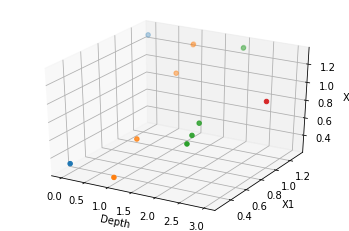

In [245]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')

for i, pos in enumerate(positions):
    ax.scatter([i]*len(pos), pos[:,0], pos[:,1], marker='o')
    
ax.set_xlabel('Depth')
ax.set_ylabel('X1')
ax.set_zlabel('X2')

### Update one at a time

In [99]:
def compute_del_position(index, positions, layers):
    i = index
    if i == 0:
#             wts = layers[i].weights**2
#             wts = layers[i].weights
        wts = np.abs(layers[i].weights)
        pos = positions[i+1]
    elif i == len(layers):
#             wts = (layers[i-1].weights**2).T
#             wts = (layers[i-1].weights).T
        wts = np.abs(layers[i-1].weights.T)
        pos = positions[i-1]
    else:
#             wts_next = layers[i].weights**2
#             wts_next = layers[i].weights
        wts_next = np.abs(layers[i].weights)
#             wts_prev = (layers[i-1].weights**2).T
#             wts_prev = (layers[i-1].weights).T
        wts_prev = np.abs(layers[i-1].weights.T)
        wts = np.concatenate((wts_prev, wts_next), axis=1)
        pos = np.concatenate((positions[i-1], positions[i+1]), axis=0)

    scaler = wts.sum(axis=1, keepdims=True)
    del_pos = (wts/scaler)@pos
    new_pos = del_pos.sum(axis=1, keepdims=True)

    del_position = - new_pos + positions[i]
    return del_position

def compute_del_position_forward(index, positions, layers):
    i = index
    if i == 0:
        wts = np.abs(layers[i].weights)
        pos = positions[i+1]

    else:
        wts = np.abs(layers[i-1].weights.T)
        pos = positions[i-1]

    scaler = wts.sum(axis=1, keepdims=True)
    del_pos = (wts/scaler)@pos
    new_pos = del_pos.sum(axis=1, keepdims=True)

    del_position = - new_pos + positions[i]
#     if i == 0:
#         del_position *= 0.5
    return del_position

In [115]:
n_neurons = [2,5,5,1]
space_D = 1
layers = [layer1, layer2, layer3]

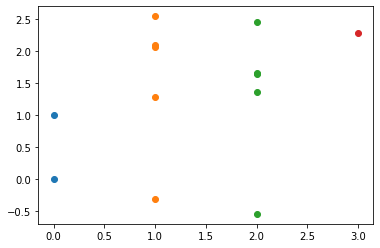

In [116]:
positions = initialize_positions(layers, n_neurons, space_D)
positions = normalize_positions(positions)

%matplotlib inline
for i, pos in enumerate(positions):
    plt.scatter([i]*len(pos), pos)

In [117]:
lr = 1

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(1000):
    
    if epoch%1 == 0:
        ax.clear()
        for i, pos in enumerate(positions):
            ax.scatter([i]*len(pos), pos)
        fig.canvas.draw()
        plt.pause(0.1)
        
    for i in range(len(positions)):
        del_position = compute_del_position_forward(i, positions, layers)
        positions[i] = positions[i] - lr*del_position
    positions = normalize_positions(positions)

TclError: can't invoke "update" command: application has been destroyed

In [118]:
positions = normalize_positions(positions)
positions

[array([[0.],
        [1.]]), array([[0.83408554],
        [0.48474822],
        [0.50575592],
        [0.34960847],
        [0.62329964]]), array([[0.54345732],
        [0.63646734],
        [0.57044297],
        [0.57820231],
        [0.71789157]]), array([[0.5946926]])]

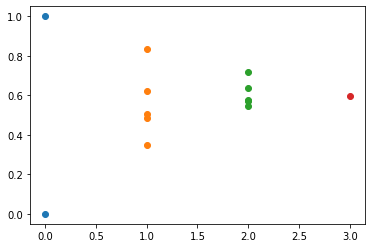

In [119]:
%matplotlib inline
for i, pos in enumerate(positions):
    plt.scatter([i]*len(pos), pos)

In [120]:
for i in range(len(positions)):
    del_position = compute_del_position_forward(i, positions, layers)
    print(del_position)

[[-0.49665755]
 [ 0.39987184]]
[[-2.22044605e-16]
 [-7.21644966e-16]
 [ 0.00000000e+00]
 [-3.33066907e-16]
 [ 4.44089210e-16]]
[[ 1.22124533e-15]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 0.00000000e+00]
 [-1.11022302e-16]]
[[1.33226763e-15]]
